In [11]:
import pickle
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

(12, 60, 1)
         0         1         2         3         4         5         6   \
0  0.026079  0.025921  0.047063  0.025353  0.031944  0.051901  0.046078   
1  0.005783  0.021025  0.035666  0.044783  0.050437  0.052678  0.051657   
2  0.007864  0.024846  0.033409  0.035903  0.031965  0.025288  0.019094   
3  0.005685  0.020559  0.031019  0.035968  0.036767  0.034745  0.031928   
4  0.006422  0.026749  0.042362  0.050102  0.052881  0.052923  0.051452   

         7         8         9   ...        50        51        52        53  \
0  0.051090  0.032311  0.039108  ...  0.000571  0.000755  0.000787  0.000797   
1  0.049406  0.046778  0.043766  ...  0.000672  0.000654  0.000639  0.000621   
2  0.015484  0.014328  0.015825  ...  0.003933  0.003875  0.004057  0.004095   
3  0.029755  0.028762  0.028699  ...  0.002004  0.001894  0.001868  0.001842   
4  0.049246  0.046625  0.043784  ...  0.000741  0.000646  0.000567  0.000499   

         54        55        56        57        58     

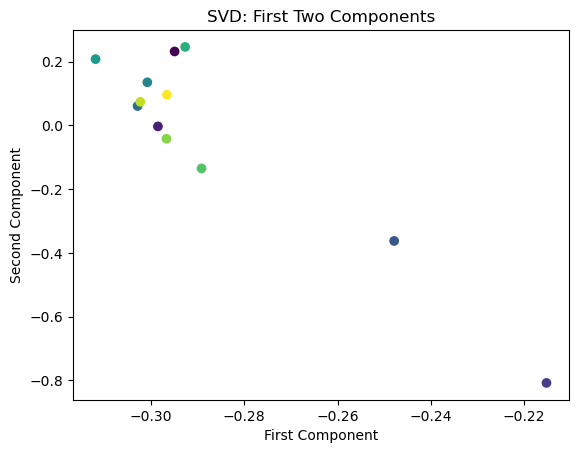

TypeError: 'int' object is not iterable

<Figure size 1000x600 with 0 Axes>

In [15]:
with open("avg_pd_equilibrium", 'rb') as pickle_file:
    avg_pd = pickle.load(pickle_file)

# Confirmation of appropriate loading
print(np.shape(avg_pd))

# Reshape the array to (12, 60) before creating the DataFrame
reshaped_data = np.array(avg_pd).reshape(12, 60)

# Create a DataFrame
df = pd.DataFrame(reshaped_data)

# Print the DataFrame
print(df.head())

# SVD Decomposition
U, S, Vt = np.linalg.svd(df, full_matrices=False)

# Create a list of colors (replace this with your color preferences)
colors = np.arange(len(U[:, 0]))

# Plot the first two components from the U matrix
plt.scatter(U[:, 0], U[:, 1], c=colors, cmap='viridis')
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('SVD: First Two Components')
plt.show()

sp_labels = {0: "Diamond, 3000K",
             1: "Graphite, 3000K",
             2: "0.5 gcc, 1000K",
             3: "1.0 gcc, 2000K",
             4: "2.0 gcc, 6000K",
             5: "3.6 gcc, 6000K",
             6: "3.0 gcc, 8000K",
             7: "Diamond, 300K",
             8: "Graphite, 300K",
             9: "Graphite, 1500K",
             10: "2.0 gcc, 7000K",
             11: "2.5 gcc, 6000K"}

# Hierarchical clustering
linkage_matrix = linkage(df, method='median')  # You can choose a different linkage method

# Function to replace labels in the linkage matrix
def replace_labels(label, label_dict):
    return label_dict[int(label)]

# Plot the dendrogram with labeled points
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=df.index, orientation='top', distance_sort='descending', leaf_label_func=lambda x: replace_labels(x, sp_labels))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()